In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import chebyshev_2d as Chebyshev2D
import scipy.special as sp
import scipy.integrate as integrate
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [2]:
r, theta, L = Chebyshev2D.getChebyshev2d()

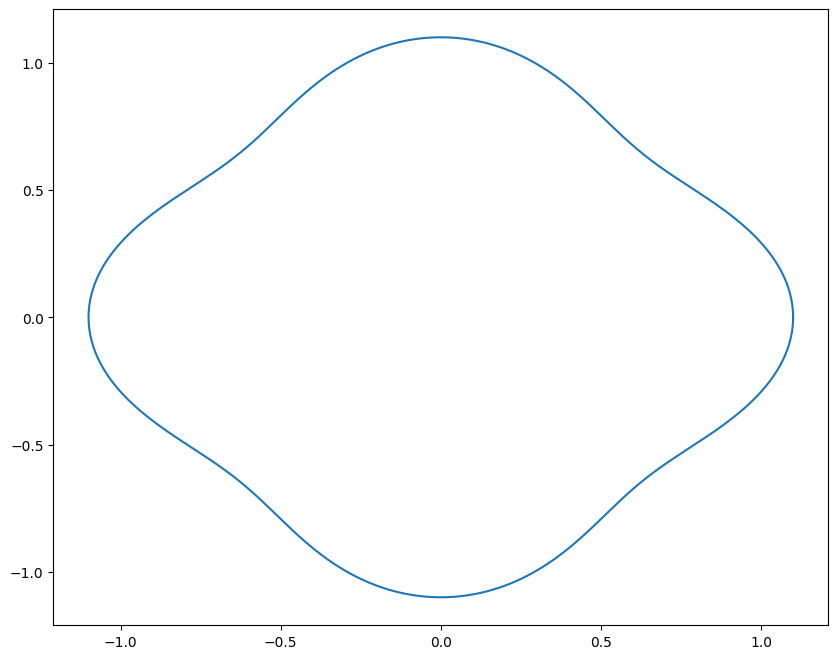

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plot the 3D surface
x = r*np.cos(theta)
y = r*np.sin(theta)

ax.plot(x, y, ls='-')

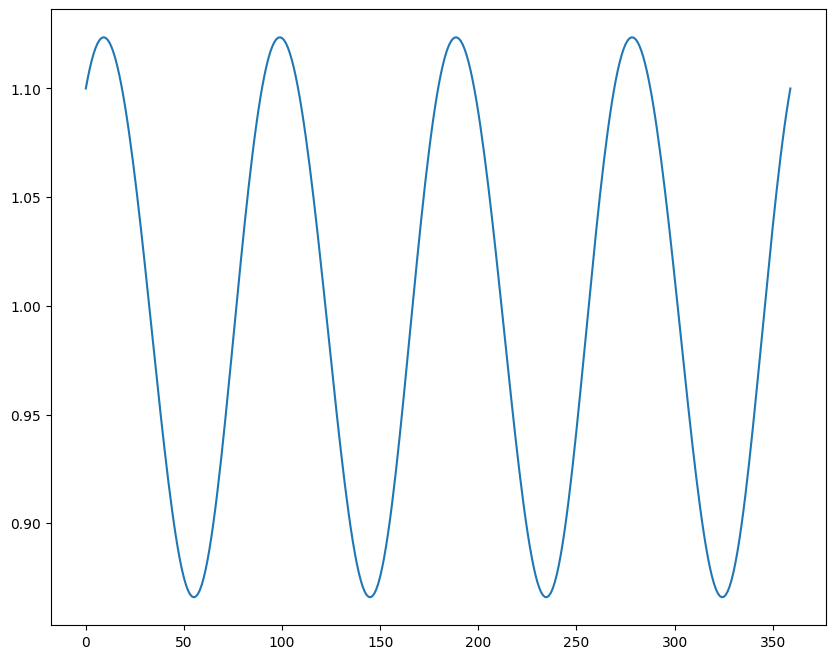

In [4]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
# Plot the 3D surface

ax.plot(L, ls='-')

In [43]:
k = np.linspace(1.0, 3.0, 20)
theta_0 = np.linspace(0, 2*np.pi, 20)

In [6]:
dif_cross_section = np.zeros((20, 20))
total_cross_section = np.zeros((20, 20))


for i in range(0, 20):
    kzin = k[i]
    for j in range(0, 20):
        theta0 = theta_0[j]
        A, B = Chebyshev2D.get_system_linear(kzin, theta0)
        X = np.linalg.solve(A, B)

        dif_cross_section[i, j] = Chebyshev2D.differential_cross_section(kzin, X)
        total_cross_section[i, j] = Chebyshev2D.total_cross_section(kzin, X)






/home/hnrqpdr/projects/chebyshev-particles/2d/complex_quadrature.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  real_integral = quad(real_func, a, b, **kwargs)
/home/hnrqpdr/projects/chebyshev-particles/2d/complex_quadrature.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  imag_integral = quad(imag_func, a, b, **kwargs)
/tmp/ipykernel_6537/1822210431.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dif_cross_section[i, j] = Chebyshev2D.differential_cross_section(kzin, X)
/tmp/ipykernel_6537/1822210431.py:13: DeprecationWarning: Conversion of an array with ndim

In [24]:
total_cross_section.shape

(20, 20)

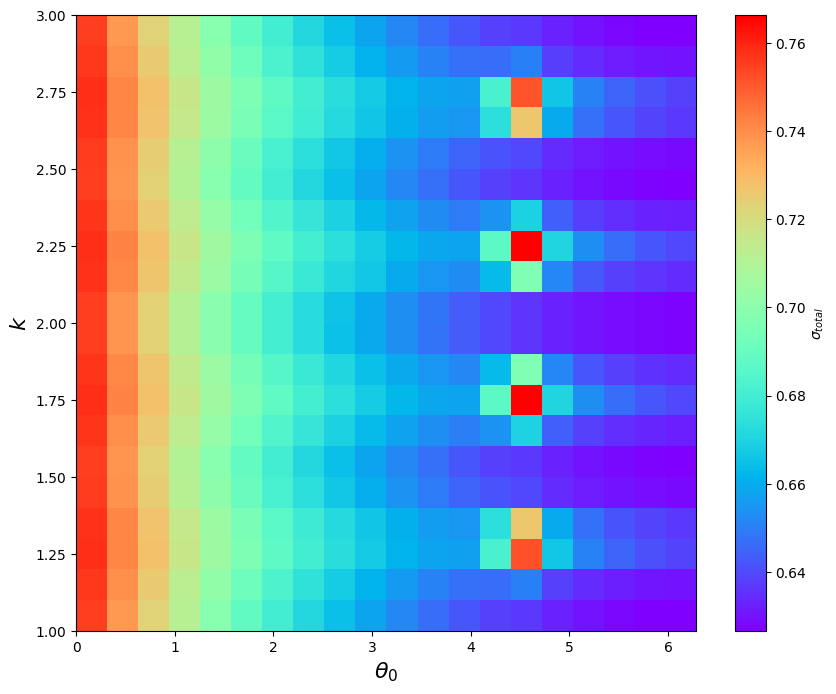

In [22]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
im = ax.imshow(total_cross_section, cmap='rainbow',interpolation='none', extent=[0,2*np.pi,1,3], aspect="auto")
# ax.set_aspect(2) # you may also use am.imshow(..., aspect="auto") to restore the aspect ratio

fig.colorbar(im, ax=ax, label='$\sigma_{total}$')
ax.set_xlabel('$\\theta_0$', fontsize=16)
ax.set_ylabel('$k$', fontsize=16)
plt.savefig('plotSecaoChoqueTotal_beta5_gamma-10.png', dpi=400)


In [54]:
l_k_columns = [f'k={k[i]}|theta_0={theta_0[i]}' for i in range(20)]

In [55]:
data_array = total_cross_section

In [ ]:
df = pd.DataFrame(data_array, columns=l_k_columns)

In [ ]:
df.to_csv('dados_sigma_total.csv', index=False)

In [52]:
data_array = np.append(total_cross_section, theta_0, axis=1)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [25]:
k = np.linspace(1.0, 3.0, 20)
theta_0 = np.linspace(0, 2*np.pi, 20)
k, theta_0 = np.meshgrid(k, theta_0)

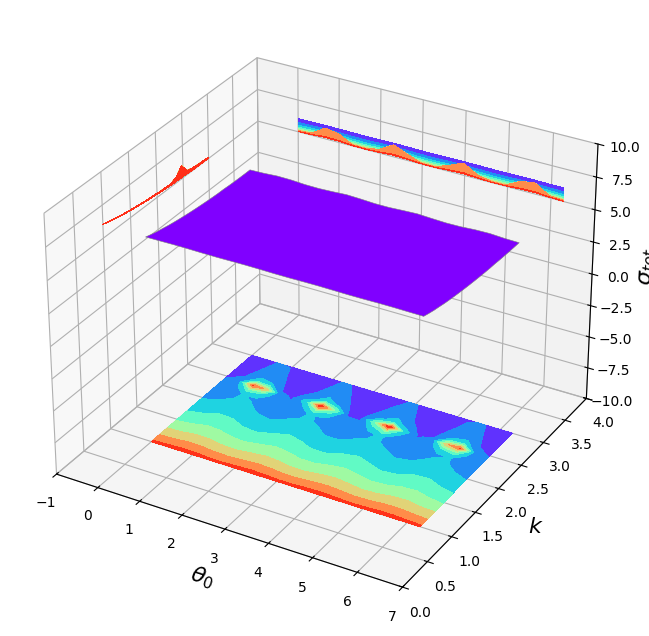

In [42]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
ax.plot_surface(theta_0, k, 8*total_cross_section, edgecolor='gray', lw=0.4, rstride=130, cstride=130, cmap='rainbow')

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(theta_0, k, 8*total_cross_section, zdir='z', offset=-10, cmap='rainbow')
ax.contourf(theta_0, k, 8*total_cross_section, zdir='x', offset=-1, cmap='rainbow')
ax.contourf(theta_0, k, 8*total_cross_section, zdir='y', offset=4, cmap='rainbow')

ax.set(xlim=(-1, 7), ylim=(0, 4), zlim=(-10, 10))

ax.set_xlabel('$\\theta_0$', fontsize=16)
ax.set_ylabel('$k$', fontsize=16)
ax.set_zlabel('$\sigma_{tot}$', fontsize=16)

# plt.show()
plt.savefig('plotSecaoChoqueTotalAll.png', dpi=400)

In [9]:
i = 0 + 1j
np.exp(i*2*np.pi)

np.complex128(1-2.4492935982947064e-16j)

In [10]:
np.angle(np.exp(i*np.pi/2))

np.float64(1.5707963267948966)